# CLUSTERING PRACTICAL

## ARTIN

## Mathieu Lagrange

reports are to be sent to [mathieu dot lagrange at ec-nantes dot fr] no later than a week after the lab

So Onishi<br>
Send to: modan.tailleur@ls2n.fr

## Import tools

please import others if needed

In [961]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

## Data: generate a synthetic dataset

Generate a set of 100 points in a 2 dimensional space split into 4 non overlapping
clusters.

100点のデータを2次元空間に生成し、それを4つの非重複クラスタに分ける問題

In [962]:
# 適当なデータセットを作成
# np.random.seed(42)

points1 = np.random.randn(25, 2)
points2 = np.random.randn(25, 2) + np.array([5, 5])
points3 = np.random.randn(25, 2) + np.array([10, 10])
points4 = np.random.randn(25, 2) + np.array([15, 15])

# print("points1:\n" + str(points1))

In [963]:
# 各クラスタにラベルを割り当てる
labels1 = np.zeros(25)  # points1に0のラベルを割り当てる
labels2 = np.ones(25)  # points2に1のラベルを割り当てる
labels3 = np.full(25, 2)  # points3に2のラベルを割り当てる（np.fullで全要素を2にする）
labels4 = np.full(25, 3)  # points4に3のラベルを割り当てる（np.fullで全要素を3にする）

# ラベル配列を結合する
truth_labels = np.r_[labels1, labels2, labels3, labels4]

print(truth_labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3.]


In [964]:
# データセット結合
points = np.r_[points1, points2, points3, points4]

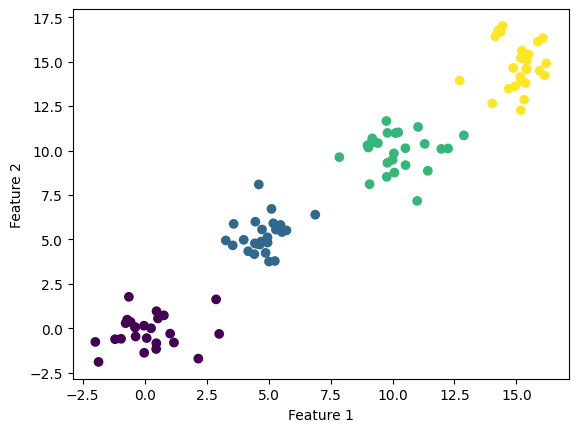

In [965]:
plt.scatter(points[:, 0], points[:, 1], c=truth_labels)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Display the set with one color per cluster using the scatter function from matplotlib.pyplot

## Baseline: the random clustering algorithm

Cluster this dataset into k clusters by assigning a random integer value between 0 and k-1 to each point.

In [966]:
# ランダムな予測ラベルを生成する関数
def generate_random_labels(num_points, num_classes):
    """
    指定された数のデータポイントに対して、0からnum_classes-1までのランダムなラベルを生成する。

    Parameters:
    num_points (int): ラベルを生成するデータポイントの数。
    num_classes (int): 生成するラベルのクラス数。

    Returns:
    numpy.array: 生成されたランダムラベルの配列。
    """
    return np.random.randint(0, num_points, num_classes)

In [967]:
pred_labels = generate_random_labels(4, len(points))
print(pred_labels)

[0 0 2 1 1 1 3 0 2 0 2 1 0 2 0 3 0 3 3 2 1 1 2 1 3 3 0 1 1 0 0 2 3 0 2 3 0
 3 3 3 3 0 1 1 3 0 0 0 1 3 1 2 2 0 3 0 2 2 2 0 2 3 1 1 2 0 1 2 3 2 3 0 0 3
 3 0 2 2 2 0 2 2 2 3 1 0 2 0 0 1 3 1 2 2 1 1 0 3 1 1]


Text(0, 0.5, 'Feature 2')

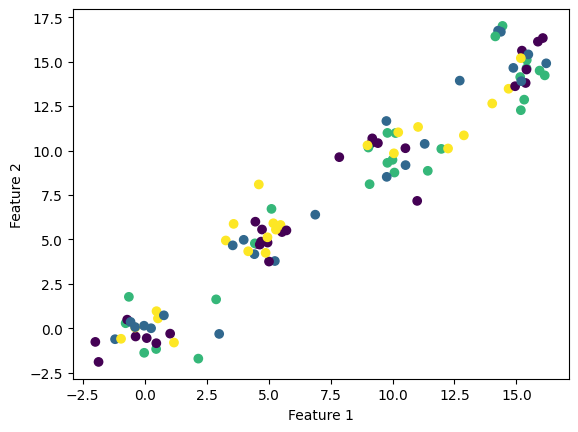

In [968]:
plt.scatter(points[:, 0], points[:, 1], c=pred_labels)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

## Metric: the rand index

Implement the rand index criterion (see https://en.wikipedia.org/wiki/Rand_index for reference)

In [969]:
# ランダムインデックスを計算する関数を定義する
def calculate_rand_index(truth_labels, pred_labels):
    n = len(truth_labels)
    tp = 0  # true positive
    tn = 0  # true negative

    for i in range(n):
        for j in range(i + 1, n):
            if truth_labels[i] == truth_labels[j] and pred_labels[i] == pred_labels[j]:
                tp += 1
            elif (
                truth_labels[i] != truth_labels[j] and pred_labels[i] != pred_labels[j]
            ):
                tn += 1

    # ランダムインデックスの計算
    rand_index = (tp + tn) / (n * (n - 1) / 2)
    return rand_index

In [970]:
rand_index = calculate_rand_index(truth_labels, pred_labels)  # ランダムインデックスを計算
print("Calculated Rand Index:", rand_index)

Calculated Rand Index: 0.6333333333333333


Compute the rand index between the reference clustering and 100 runs of the baseline algorithm.

基準クラスタリングとベースラインアルゴリズムの100回の実行の間のrandインデックスを計算する。

In [971]:
rand_indices = []

for i in range(100):
    pred_labels = generate_random_labels(4, len(points))
    index = calculate_rand_index(truth_labels, pred_labels)
    rand_indices.append(index)

In [972]:
mean_rand_index = np.mean(rand_indices)
std_rand_index = np.std(rand_indices)

Display results and compute the mean and standard deviation.

結果を表示し、平均と標準偏差を計算する。

In [973]:
print("mean:", mean_rand_index)
print("standard deviation:", std_rand_index)

mean: 0.6288888888888889
standard deviation: 0.007082875532118958


## Hierarchical Clustering

Compute the euclidean distance matrix using the pdist function from scipy.spatial.distance

scipy.spatial.distanceのpdist関数を使用してユークリッド距離行列を計算します。

In [974]:
from scipy.spatial.distance import pdist, squareform

# ユークリッド距離を計算
euclidean_distances = pdist(points)

Display and interpret its shape

In [975]:
# 距離行列を表示
print(euclidean_distances)

[0.97795647 3.54904688 1.27831626 ... 0.62685165 1.29533127 0.81163894]


answer here

The one-dimensional array representing the Euclidean distances between data points in a dataset has a length of `{n*(n-1)}/2`, where `n` is the number of data points in the dataset. This length corresponds to the number of unique pairwise combinations of points in the dataset. The two-dimensional distance matrix expands these distances into an `n * n` matrix, with the rows and columns representing the data points, and zeroes on the diagonal representing the distance of each point to itself.

Compute the single link hierarchical clustering using the linkage function from scipy.cluster.hierarchy.

scipy.cluster.hierarchyのリンケージ関数を用いてシングルリンクの階層クラスタリングを計算します。

In [976]:
from scipy.cluster.hierarchy import linkage, dendrogram

# 距離行列を用いて階層クラスタリングを行う
linkage_matrix = linkage(euclidean_distances, method="single")

Display the corresponding dendrogram using the dendrogram function from scipy.cluster.hierarchy.

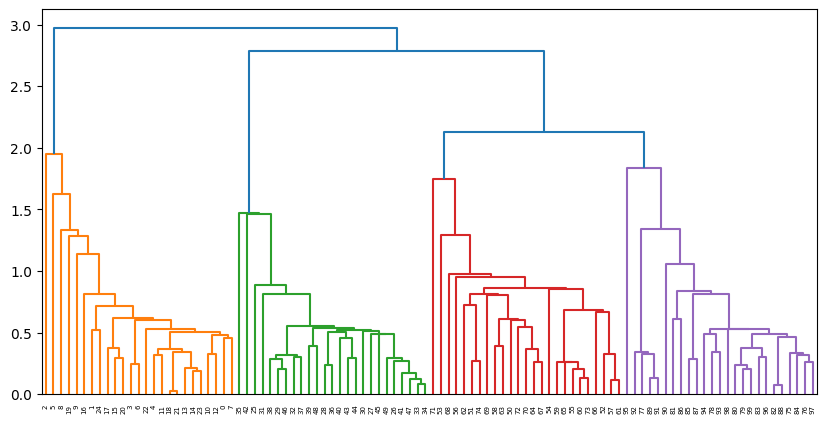

In [977]:
# 階層クラスタリングの樹形図を表示する
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.show()

Implement a clustering algorithm that cuts the dendrogram in order to produce k clusters using the fcluster function from scipy.cluster.hierarchy.

scipy.cluster.hierarchyのfcluster関数を使用して、k個のクラスタを生成するためにデンドログラムを切断するクラスタリングアルゴリズムを実装します。

In [978]:
from scipy.cluster.hierarchy import fcluster


def assign_clusters_by_number(linkage_matrix, num_clusters):
    return fcluster(linkage_matrix, num_clusters, criterion="maxclust")

In [979]:
# クラスタの数
k = 4

clusters = assign_clusters_by_number(linkage_matrix, k)

print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


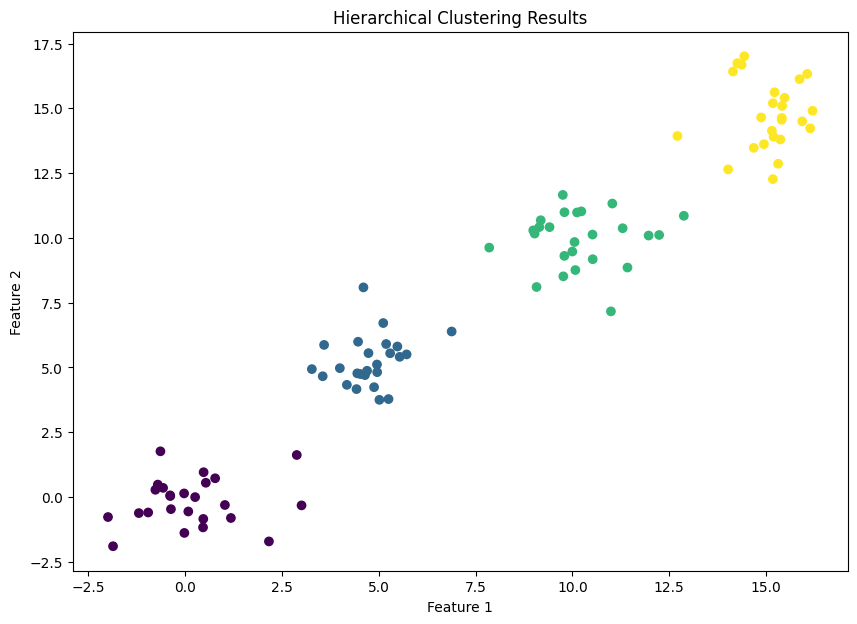

In [980]:
# 結果を表示
plt.figure(figsize=(10, 7))
plt.scatter(points[:, 0], points[:, 1], c=clusters)  # Color the points by cluster
plt.title("Hierarchical Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Compute the rand index between the reference clustering and 100 runs of this clustering algorithm.

参照クラスタリングとこのクラスタリングアルゴリズムの100回の実行の間のrandインデックスを計算する。

In [981]:
rand_indices = []

for i in range(100):
    pred_labels = assign_clusters_by_number(linkage_matrix, k)
    # 確認用
    # print(pred_labels)

    rand_index = calculate_rand_index(truth_labels, pred_labels)
    rand_indices.append(rand_index)

mean_rand_index = np.mean(rand_indices)
std_rand_index = np.std(rand_indices)

Display results and compute the mean and standard deviation.

In [982]:
print("mean:", mean_rand_index)
print("standard deviation:", std_rand_index)

mean: 1.0
standard deviation: 0.0


Explain why the standard deviation is 0.

answer here

Single-link hierarchical clustering is a deterministic algorithm, which means that it produces the same clustering results every time it is run on the same dataset. This algorithm does not incorporate any randomness, so the output remains unchanged as long as the input does not change. Therefore, the standard deviation of the Rand index over 100 runs is 0, indicating that the algorithm consistently provides the same results.

## Partitional Clustering

Implement the k-means algorithm (see https://en.wikipedia.org/wiki/K-means_clustering section Standard algorithm for reference).

Hint: please consider the cdist function from scipy.spatial.distance to compute the distance of the points to the centroids.

ヒント：セントロイド（中心）に対する点の距離を計算するために、scipy.spatial.distanceのcdist関数を考慮してください。

In [983]:
from scipy.spatial.distance import cdist

# クラスタの数
k = 4
# 中心をランダムに選択
centroids = points[np.random.choice(points.shape[0], k, replace=False)]


def k_means(points, centroids, k):
    while True:
        # 各店に対して最も近い中心を割り当て
        distances = cdist(points, centroids, "euclidean")  # 各点と各中心の距離
        clusters = np.argmin(distances, axis=1)  # 最も近い中心のインデックス

        # 新しい中心の計算
        new_centroids = []  # クラスタの数に対して空のリストを用意

        # 各クラスタに対してループを実行します。
        for i in range(k):
            # クラスタiに属するすべてのポイントを選択します。
            cluster_points = points[clusters == i]

            # 選択したポイントの平均を計算します（セントロイドを計算）。
            centroid = cluster_points.mean(axis=0)

            # 計算したセントロイドをリストに追加します。
            new_centroids.append(centroid)

        # リストをNumPy配列に変換します。
        new_centroids = np.array(new_centroids)

        # 収束チェック
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return clusters, centroids


clusters, centroids = k_means(points, centroids, k)

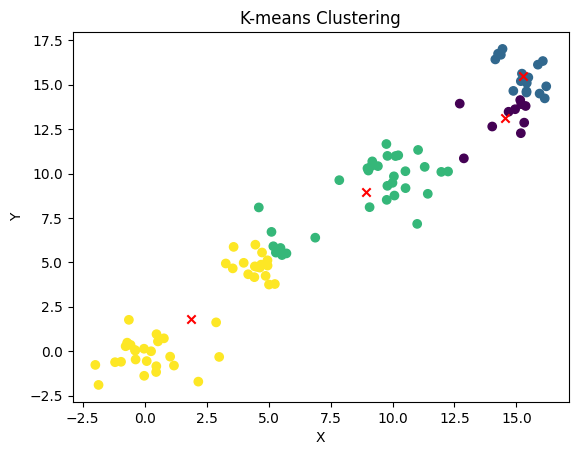

In [984]:
plt.scatter(points[:, 0], points[:, 1], c=clusters, cmap="viridis", marker="o")
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", marker="x")  # セントロイドを赤いXで表示
plt.title("K-means Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Compute the rand index between the reference clustering and 100 runs of this clustering algorithm.

参照クラスタリングとこのクラスタリングアルゴリズムの100回の実行の間のrandインデックスを計算する。

In [985]:
rand_indices = []

for i in range(100):
    # 中心の初期化とk-meansの実行
    initial_centroids = points[np.random.choice(points.shape[0], k, replace=False)]
    pred_labels, _  = k_means(points, initial_centroids, k)

    # ランド指数の計算
    rand_index = calculate_rand_index(truth_labels, pred_labels)
    # 確認用
    # print(rand_index)
    rand_indices.append(rand_index)

# 平均値と標準偏差の計算
mean_rand_index = np.mean(rand_indices)
std_rand_index = np.std(rand_indices)

Display results and compute the mean and standard deviation.

In [986]:
print("mean:", mean_rand_index)
print("standard deviation:", std_rand_index)

mean: 0.9430929292929292
standard deviation: 0.07949786138185955


## Performance Analysis

Display the performance of the 3 clustering algorithms on the synthetic dataset using the bar function from matplotlib.pyplot.

Load the iris dataset using the load_iris function from scikit-learn and perform the same performance analysis using this dataset.

Load the Breast cancer wisconsin (diagnostic) dataset dataset using the load_breast_cancer function from scikit-learn and perform the same performance analysis using this dataset.

## [Bonus] Determining the number of clusters

Implement the gap statistic method for determining the optimal number of clusters for the 3 datasets.


Discuss the results.

answer here.